<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-louvain
!pip install networkx
!pip install cdlib

Here are the imports!

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from random import sample
import numpy as np

In [2]:
filenameFacebook = "/content/facebook/414.edges"

In [3]:
graphFacebook = nx.Graph()

with open(filenameFacebook) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphFacebook.nodes):
            graphFacebook.add_node(a)
        if b not in list(graphFacebook.nodes):
            graphFacebook.add_node(b)

        graphFacebook.add_edge(a, b)

#Question (a)

In [57]:
listOfNodesWithCorrespondingDegrees = list(graphFacebook.degree(list(graphFacebook.nodes)))
sortedListOfNodesWithCorrespondingDegrees = sorted(
    listOfNodesWithCorrespondingDegrees,
    key=lambda t: t[1],
    reverse=True)

tenNodesWithHighestDegree = []

for i in range(0, 10):
  tenNodesWithHighestDegree.append(sortedListOfNodesWithCorrespondingDegrees[i])
  
tenNodes = []

for i in range(0, 10):
  tenNodes.append(tenNodesWithHighestDegree[i][0])
print("The ten chosen nodes are", tenNodes)

The ten chosen nodes are [376, 373, 513, 428, 483, 348, 591, 559, 436, 475]


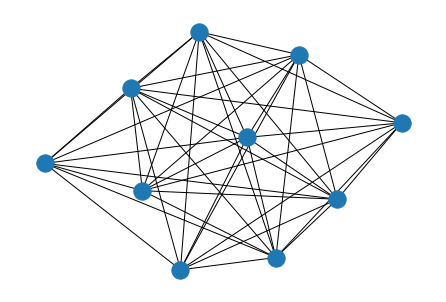

In [58]:
inducedFacebook = nx.induced_subgraph(graphFacebook, tenNodes)
nx.draw(inducedFacebook)

#Question (b)

For community detection, there are the following algorithms:

* Girvan-Newman algorithm
* Greedy_modularity_communities algorithm
* Louvain algorithm


#Question (c)

In [119]:
def draw_circular_networkx(G, color_map, external, internal, name):
  plt.figure(figsize = (20, 20))
  graph_pos = nx.circular_layout(G)
  ax = plt.gca()
  ax.set_title(name)
  nx.draw_networkx(G, node_size=0, edgelist=external, pos=graph_pos, edge_color="silver", with_labels = False, ax=ax)
  nx.draw_networkx(G, node_color=color_map, edgelist=internal, pos=graph_pos, edge_color="black", with_labels = True, ax=ax)

In [125]:
def draw_plot_networkx(G, color_map, external, internal, name):
  plt.figure(figsize = (20, 20))
  graph_pos = nx.spring_layout(G)
  ax = plt.gca()
  ax.set_title(name)
  nx.draw_networkx(G, node_size=0, edgelist=external, pos=graph_pos, edge_color="silver", with_labels = False, ax=ax)
  nx.draw_networkx(G, node_color=color_map, edgelist=internal, pos=graph_pos, edge_color="black", with_labels = True, ax=ax)

In [61]:
def get_color_map(nodeGroups, G):
  listOfColors = []

  for i in range(len(nodeGroups)):
    listOfColors.append(list(np.random.choice(range(255),size=3)))

  for i in range(len(listOfColors)):
    for j in range(3):
      listOfColors[i][j] = listOfColors[i][j] /255

  colorMap = []

  for node in G:
    for i in range(len(nodeGroups)):
      if node in nodeGroups[i]:
        colorMap.append(listOfColors[i])
  
  return colorMap

In [124]:
def get_community_edges(nodeGroups, G):
  external = []
  internal = []

  for i in range(len(nodeGroups)):
    for node_in in nodeGroups[i]:
      for node_ex in G.nodes:
        if G.has_edge(node_in, node_ex) == True:
          if node_ex in nodeGroups[i]:
            if (node_in, node_ex) not in internal and (node_ex, node_in) not in internal:
              internal.append((node_in, node_ex))
          else:
            if (node_in, node_ex) not in external and (node_ex, node_in) not in external:
              external.append((node_in, node_ex))

  return external, internal

Girvan-Newman algorithm

In [63]:
communitiesGN = community.girvan_newman(graphFacebook)

In [64]:
nodeGroupsGN = []

for community in next(communitiesGN):
  nodeGroupsGN.append(list(community))

print("There is", len(nodeGroupsGN), "communities in the Facebook Ego.")

There is 3 communities in the Facebook Ego.


In [98]:
externalGN = get_community_edges(nodeGroupsGN, graphFacebook)[0]
internalGN = get_community_edges(nodeGroupsGN, graphFacebook)[1]

In [67]:
colorMapGN = get_color_map(nodeGroupsGN, graphFacebook)

In [ ]:
draw_plot_networkx(graphFacebook, colorMapGN, externalGN, internalGN, 
                   "Facebook-Ego with different communities found by Girvan-Newman algorithm")

In [ ]:
draw_circular_networkx(graphFacebook, colorMapGN, externalGN, internalGN,  
                       "Facebook-Ego with different communities found by Girvan-Newman algorithm")

Greedy-modularity-communities detection algorithm

In [70]:
from networkx.algorithms import community
communitiesGMC = community.greedy_modularity_communities(graphFacebook)

In [71]:
print("There is", len(communitiesGMC), "communities in the Facebook Ego.")

There is 5 communities in the Facebook Ego.


In [129]:
externalGMC = get_community_edges(communitiesGMC, graphFacebook)[0]
internalGMC = get_community_edges(communitiesGMC, graphFacebook)[1]

In [72]:
colorMapGMC = get_color_map(communitiesGMC, graphFacebook)

In [ ]:
draw_plot_networkx(graphFacebook, colorMapGMC, externalGMC, internalGMC,
                   "Facebook-Ego with different communities found by Greedy-Morality-Communities algorithm")

In [ ]:
draw_circular_networkx(graphFacebook, colorMapGMC, externalGMC, internalGMC,
                       "Facebook-Ego with different communities found by Greedy-Morality-Communities algorithm")

Louvain Algorithm

In [132]:
from community import community_louvain
communitiesLA = community_louvain.best_partition(graphFacebook)

In [133]:
listValuesOfTheCommunities = list(communitiesLA.values())
nodeGroupsLA = []

for i in listValuesOfTheCommunities:
  if i not in nodeGroupsLA:
    nodeGroupsLA.append(i)

In [134]:
nodeCommunitiesLA = []

for i in range(len(nodeGroupsLA)):
  nodeCommunitiesLA.append([])

for node in communitiesLA.keys():
  nodeCommunitiesLA[communitiesLA[node]].append(node)

print("There is", len(nodeCommunitiesLA), "communities in the Facebook Ego.")

There is 5 communities in the Facebook Ego.


In [137]:
externalLA = get_community_edges(nodeCommunitiesLA, graphFacebook)[0]
internalLA = get_community_edges(nodeCommunitiesLA, graphFacebook)[1]

In [135]:
colorMapLA = get_color_map(nodeCommunitiesLA, graphFacebook)

In [ ]:
draw_plot_networkx(graphFacebook, colorMapLA, externalLA, internalLA,
                   "Facebook-Ego with different communities found by Louvain algorithm")

In [ ]:
draw_circular_networkx(graphFacebook, colorMapLA, externalLA, internalLA,
                       "Facebook-Ego with different communities found by Louvain algorithm")